# Import library

In [1]:
import numpy as np
import pandas as pd

import missingno as msno

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

%matplotlib inline

In [2]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
submission = pd.read_csv('data/sample_submission.csv', index_col='id')

# Info and Describe dataset

In [3]:
pd.concat([df_train.describe().T, df_train.head(10).T], axis = 1)

,count,mean,std,min,25%,50%,75%,max,0,1,2,3,4,5,6,7,8,9
id,595212.0,743803.558435,429367.820429,7.000000,371991.500000,743547.500000,1.115549e+06,1.488027e+06,7.000000,9.000000,13.000000,16.000000,17.000000,19.000000,20.000000,22.000000,26.000000,28.000000
target,595212.0,0.036448,0.187401,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
ps_ind_01,595212.0,1.900378,1.983789,0.000000,0.000000,1.000000,3.000000e+00,7.000000e+00,2.000000,1.000000,5.000000,0.000000,0.000000,5.000000,2.000000,5.000000,5.000000,1.000000
ps_ind_02_cat,595212.0,1.358943,0.664594,-1.000000,1.000000,1.000000,2.000000e+00,4.000000e+00,2.000000,1.000000,4.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
ps_ind_03,595212.0,4.423318,2.699902,0.000000,2.000000,4.000000,6.000000e+00,1.100000e+01,5.000000,7.000000,9.000000,2.000000,0.000000,4.000000,3.000000,4.000000,3.000000,2.000000
ps_ind_04_cat,595212.0,0.416794,0.493311,-1.000000,0.000000,0.000000,1.000000e+00,1.000000e+00,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
ps_ind_05_cat,595212.0,0.405188,1.350642,-1.000000,0.000000,0.000000,0.000000e+00,6.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ps_ind_06_bin,595212.0,0.393742,0.488579,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
ps_ind_07_bin,595212.0,0.257033,0.436998,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
ps_ind_08_bin,595212.0,0.163921,0.370205,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+00,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000


# Split columns by category

In [4]:
df_train.columns

Index(['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14',
       'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04',
       'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09',
       'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin'],


In [5]:
ind_cols = [ col for col in df_train.columns if '_ind_' in col ]
reg_cols = [ col for col in df_train.columns if '_reg_' in col ]
car_cols = [ col for col in df_train.columns if '_car_' in col ]
calc_cols = [ col for col in df_train.columns if '_calc_' in col ]

# Check missing-value using missingno

In [6]:
df_train_copy = df_train.copy().replace(-1, np.NaN)
NanInfo = df_train_copy.isna().sum().sort_values(ascending=False)
NanInfo = NanInfo[NanInfo > 0]
pd.DataFrame(index = NanInfo.index, data = NanInfo, columns = ['Sum of NaN'])

,Sum of NaN
ps_car_03_cat,411231
ps_car_05_cat,266551
ps_reg_03,107772
ps_car_14,42620
ps_car_07_cat,11489
ps_ind_05_cat,5809
ps_car_09_cat,569
ps_ind_02_cat,216
ps_car_01_cat,107
ps_ind_04_cat,83


### The missing no module is used to determine whether there are missing values. In the graph below, the lower the bar, the more missing values.

### Since the number of variables is large, we check the missing values by dividing them by variables.  

<Axes: >

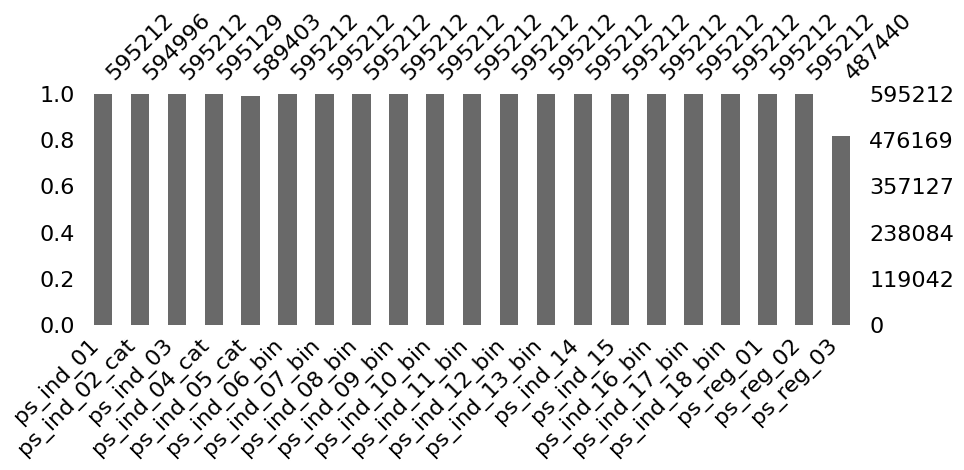

In [7]:
msno.bar(df = df_train_copy[ind_cols + reg_cols], figsize=(10, 3))

<Axes: >

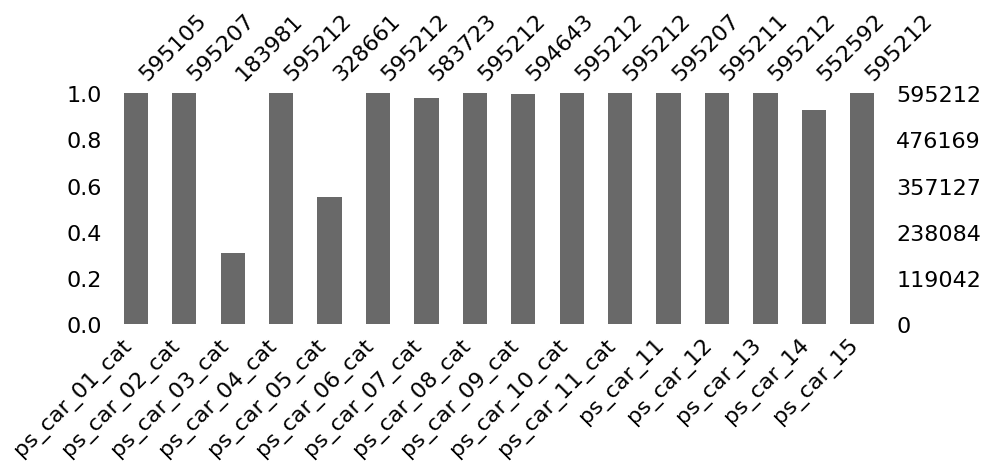

In [8]:
df_train_copy = df_train.copy().replace(-1, np.NaN)
msno.bar(df = df_train_copy[car_cols], figsize=(10, 3))

<Axes: >

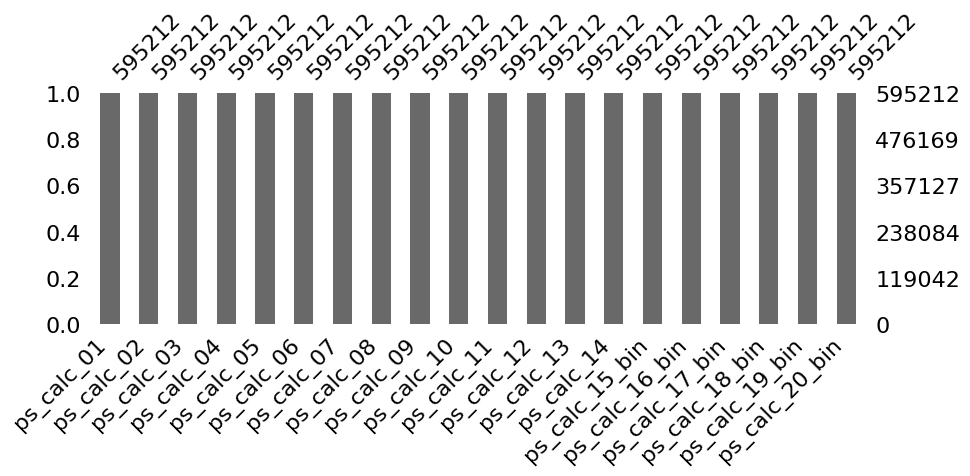

In [9]:
df_train_copy = df_train.copy().replace(-1, np.NaN)
msno.bar(df = df_train_copy[calc_cols], figsize=(10, 3))

## Print feature summary

### Create a feature summary table so that you can quickly identify features. These summary tables are convenient for data management and can be used to draw graphs in the future.

In [10]:
def resumetable(df):
    print(f'Dataset shape : {df.shape}' )
    summary = pd.DataFrame(df.dtypes, columns = ['Data type'])
    summary = summary.assign(
        NumOfNan = (df == -1).sum().values,
        Nunique = df.nunique().values,
        Category = None
    )
    for col in df.columns:
        if 'bin' in col or col == 'target':
            summary.loc[col, 'Category'] = 'binary'
        elif 'cat' in col:
            summary.loc[col, 'Category'] = 'nominal'
        elif df[col].dtype == float:
            summary.loc[col, 'Category'] = 'continous'
        elif df[col].dtype == int:
            summary.loc[col, 'Category'] = 'ordinal'
    return summary

In [11]:
summary = resumetable(df_train)
summary.head(10)

Dataset shape : (595212, 59)


,Data type,NumOfNan,Nunique,Category
id,int64,0,595212,ordinal
target,int64,0,2,binary
ps_ind_01,int64,0,8,ordinal
ps_ind_02_cat,int64,216,5,nominal
ps_ind_03,int64,0,12,ordinal
ps_ind_04_cat,int64,83,3,nominal
ps_ind_05_cat,int64,5809,8,nominal
ps_ind_06_bin,int64,0,2,binary
ps_ind_07_bin,int64,0,2,binary
ps_ind_08_bin,int64,0,2,binary


# Data Visualization

### Through data visualization, we identify what features are needed and what features are not needed for modeling.

## Target Visualization
- Use the target value distribution to determine how unbalanced the target value is.
- In addition, the target value ratio of features for each type is identified.

In [12]:
def write_percent(ax, total):
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2.,
                height + 3,
                '{:.2f}%'.format((height / total) * 100),
                ha="center")

def plot_target_ratio_by_features(df, features, num_row, num_cols, size = (12,18)):
    plt.figure(figsize = size)
    grid = gridspec.GridSpec(num_row, num_cols)

    for idx, feature in enumerate(features):
        ax = plt.subplot(grid[idx])
        sns.barplot(data = df, x = feature, y = 'target', ax = ax)
    plt.tight_layout()
    plt.show()

Text(0.5, 1.0, 'Target Distribution')

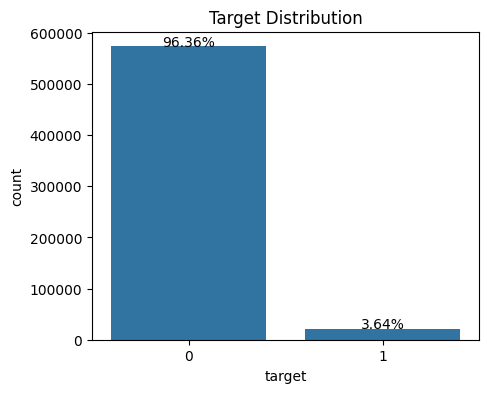

In [13]:
plt.figure(figsize = (5,4))
ax = sns.countplot(x = 'target', data = df_train)
write_percent(ax, len(df_train))
ax.set_title('Target Distribution')

#### Target value 0 is 96.36%, and 1 is 3.64%. This means that only 3.6% of all drivers have claimed insurance.

#### Since the target value is unbalanced, it is important to predict target value 1 with a small ratio well. Therefore, check the target value 1 ratio for each feature's eigenvalue.

## Target Visualization - Binary Feature

In [14]:
bin_cols = summary.loc[summary.Category == 'binary'].index

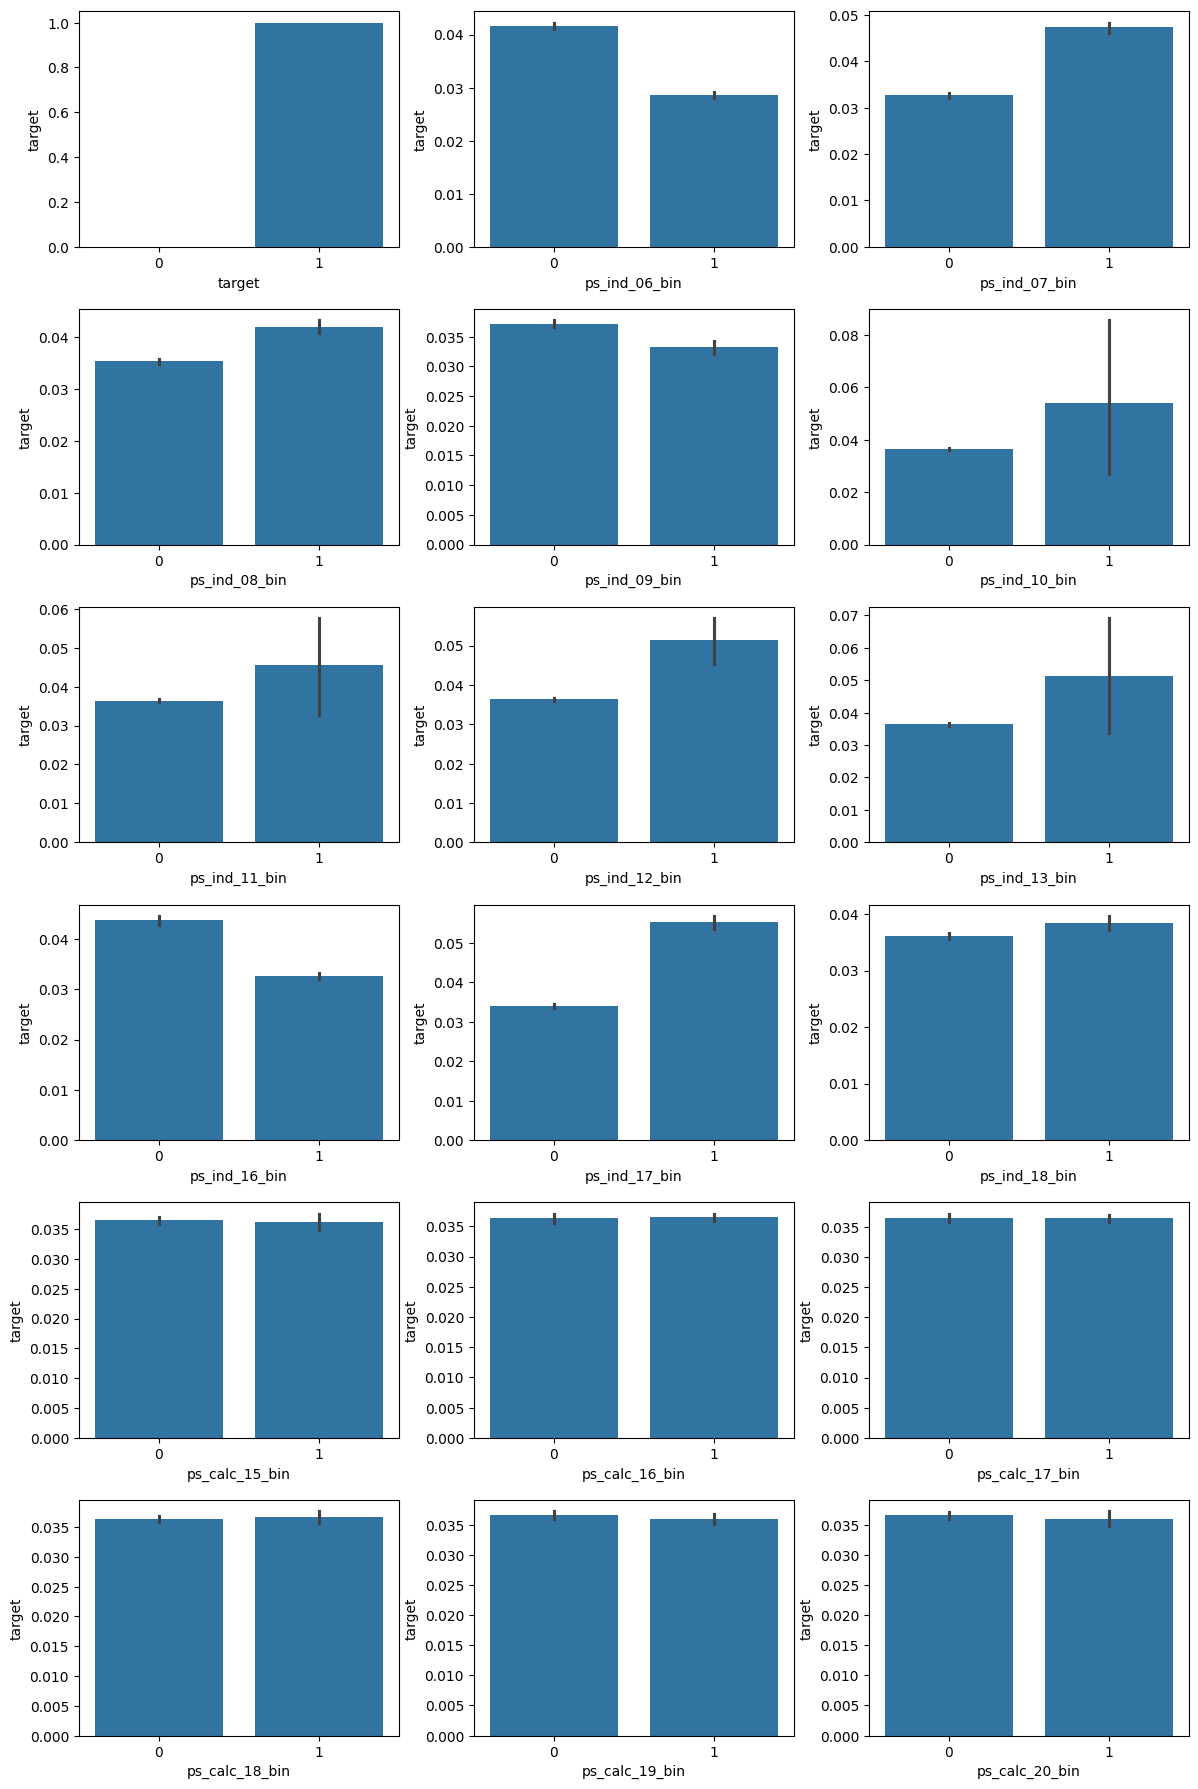

In [15]:
plot_target_ratio_by_features(df_train, bin_cols, 6, 3)

#### The ps_ind_10_bin ~ ps_ind_13_bin features have very wide confidence intervals, so statistical validity is low.
#### The ps_calc_15_bin ~ ps_calc_20_bin features have low target value prediction power because there is no difference in the target value ratio for each eigenvalue.

In [16]:
drop_list = ['ps_ind_{}_bin'.format(i) for i in range(10,14)] + ['ps_calc_{}_bin'.format(i) for i in range(15,21)]
print(drop_list)

['ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin', 'ps_calc_20_bin']


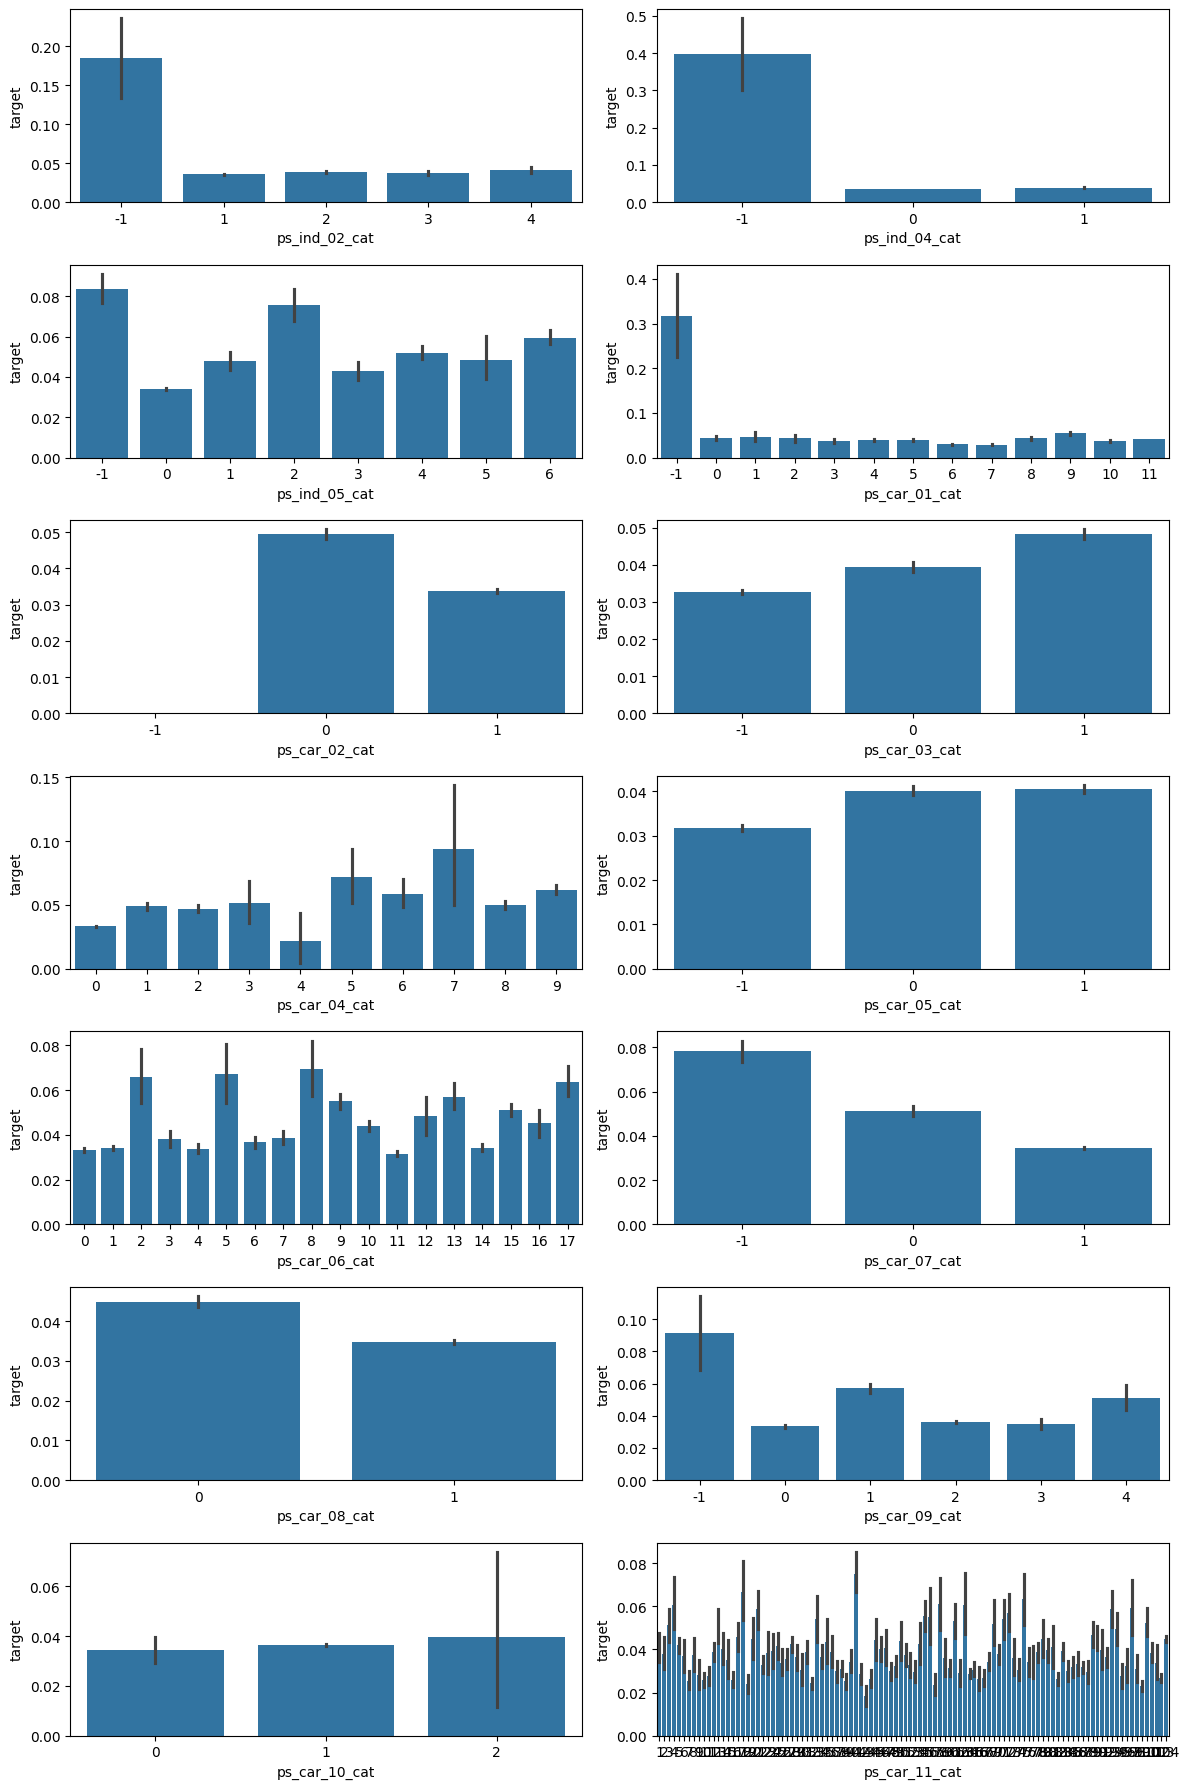

In [17]:
nom_cols = summary.loc[summary.Category == 'nominal'].index
plot_target_ratio_by_features(df_train, nom_cols, 7, 2)

 - '-1' means missing value.
 - 'ps_ind_02_cat' : In a situation where missing values (-1) have a higher proportion of the target value 1 compared to other unique values, even considering the wide confidence interval, the proportion is still higher. Given this, replacing missing values with other values may worsen the model's performance. This is because missing values themselves have predictive power for the target value. Therefore, we proceed with modeling without replacing missing values.


In [18]:
# ord_cols = summary.loc[summary.Category == 'ordinal'].index
# plot_target_ratio_by_features(df_train, ord_cols, 8, 2, (12, 20))

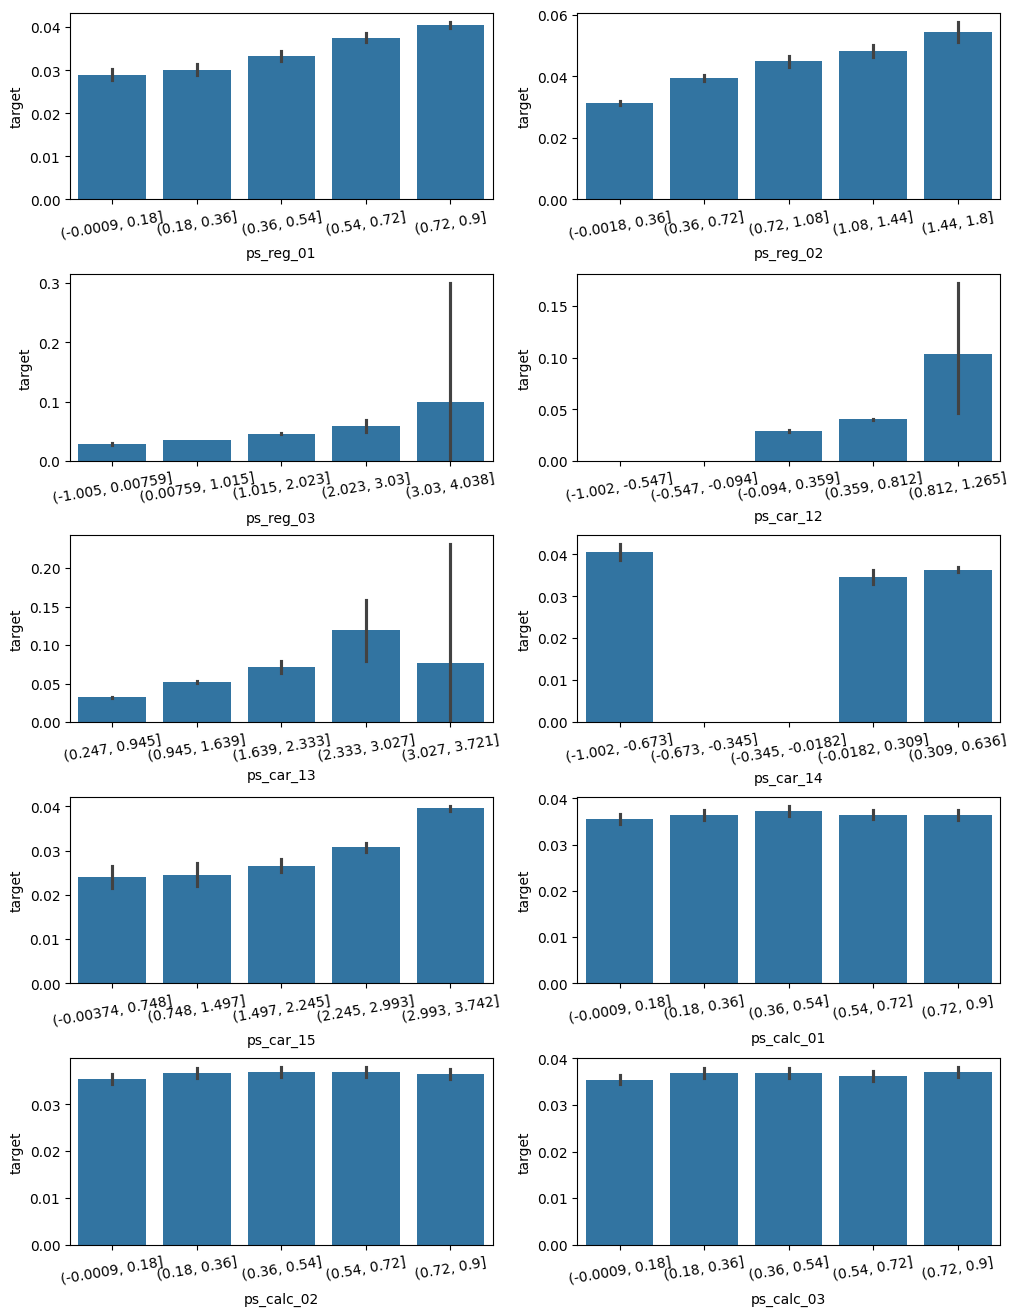

In [19]:
cont_features = summary[summary.Category == 'continous'].index

plt.figure(figsize =(12, 16))
grid = gridspec.GridSpec(5, 2)
plt.subplots_adjust(wspace = 0.2, hspace = 0.4)
df_tmp = df_train.copy()
for idx, cont_feature in enumerate(cont_features):
    # Divide the value by 5
    df_tmp[cont_feature] = pd.cut(df_tmp[cont_feature], 5)
    ax = plt.subplot(grid[idx])
    sns.barplot(x = cont_feature, y = 'target', data = df_tmp, ax = ax)
    ax.tick_params(axis = 'x', labelrotation = 10)
    

## Feature Engineering

### 0. Concatenate train and test data

In [20]:
df_all = pd.concat([df_train, df_test], ignore_index = True)
df_all = df_all.drop(columns = ['target'], axis = 1)

In [21]:
all_features = df_all.columns
print(all_features)

Index(['id', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat',
       'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin',
       'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
       'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin',
       'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03',
       'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat',
       'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat',
       'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11',
       'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01',
       'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06',
       'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11',
       'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin',
       'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin',
       'ps_calc_20_bin'],
      dtyp

### 1. OneHotEncoder

In [22]:
from sklearn.preprocessing import OneHotEncoder

cat_features = [feature for feature in all_features if 'cat' in feature]

ohe = OneHotEncoder()
encoded_cat_matrix = ohe.fit_transform(df_all[cat_features])
encoded_cat_matrix

<1488028x184 sparse matrix of type '<class 'numpy.float64'>'
	with 20832392 stored elements in Compressed Sparse Row format>

### 2. Add missing value count to column

In [23]:
df_all['num_missing'] = (df_all == -1).sum(axis = 1)

### 2. Remove unnecessary columns

In [24]:
df_all.columns

Index(['id', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat',
       'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin',
       'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
       'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin',
       'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03',
       'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat',
       'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat',
       'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11',
       'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01',
       'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06',
       'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11',
       'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin',
       'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin',
       'ps_calc_20_bin', 'num_missin

In [25]:
ind_features = [ feature for feature in all_features if 'ind' in feature ]

is_first_feature = True
for ind_feature in ind_features:
    if is_first_feature:
        df_all['mix_ind'] = df_all[ind_feature].astype(str) + '_'
        is_first_feature = False
    else:
        df_all['mix_ind'] += df_all[ind_feature].astype(str) + '_'
        
cat_count_features = []
for feature in cat_features + ['mix_ind']:
    val_counts_dict = df_all[feature].value_counts().to_dict()
    df_all[f'{feature}_count'] = df_all[feature].apply(lambda x: val_counts_dict[x])
    cat_count_features.append(f'{feature}_count')

drop_features = ['ps_ind_14', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_car_14']

remaining_features = [feature for feature in all_features if ('cat' not in feature and 'calc' not in feature and feature not in drop_features)]
remaining_features.append('num_missing')

all_data_remainig = df_all[remaining_features + cat_count_features]

In [26]:
from scipy import sparse
all_data_sprs = sparse.hstack([sparse.csr_matrix(all_data_remainig),
                               encoded_cat_matrix],
                               format='csr')

### 3. Split Train and Test data

In [27]:
num_train = len(df_train)

X = all_data_sprs[:num_train]
X_test = all_data_sprs[num_train:]
y = df_train['target'].values

### 4. Implement Gini metric method

In [28]:
def eval_gini(y_true, y_pred):
    assert y_true.shape == y_pred.shape
    
    n_samples = y_true.shape[0]
    L_mid = np.linspace(1 / n_samples, 1, n_samples)
    
    pred_order = y_true[y_pred.argsort()]
    L_pred = np.cumsum(pred_order) / np.sum(pred_order)
    G_pred = np.sum(L_mid - L_pred)
    
    true_order = y_true[y_true.argsort()]
    L_true = np.cumsum(true_order) / np.sum(true_order)
    G_true = np.sum(L_mid - L_true)
    
    return G_pred / G_true
    

In [29]:
# Metric for lightgbm
def gini(preds, dtrain):
    labels = dtrain.get_label()
    return 'gini', eval_gini(labels, preds), True

### Train LightGBM model

In [30]:
from sklearn.model_selection import StratifiedKFold
import lightgbm as lgb

folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 1991)

params = {
    'objective': 'binary',
    'learning_rate': 0.01,
    'force_row_wise': True,
    'random_state': 123
}

oof_val_preds = np.zeros(X.shape[0])
oof_test_preds = np.zeros(X_test.shape[0])


for idx, (train_idx, valid_idx) in enumerate(folds.split(X, y)):
    X_train, y_train = X[train_idx], y[train_idx]
    X_valid, y_valid = X[valid_idx], y[valid_idx]
    
    dtrain = lgb.Dataset(X_train, y_train)
    dvalid = lgb.Dataset(X_valid, y_valid)
    
    lgb_model = lgb.train(params = params,
                          train_set = dtrain,
                          num_boost_round = 1000,
                          valid_sets = dvalid,
                          feval = gini,
                          callbacks=[lgb.early_stopping(stopping_rounds=100)]
                          )
    oof_test_preds += lgb_model.predict(X_test)/ folds.get_n_splits()
    oof_val_preds[valid_idx] += lgb_model.predict(X_valid)
    
    gini_score = eval_gini(y_valid, oof_val_preds[valid_idx])
    print(f'Fold {idx + 1} Gini score: {gini_score:.4f}')


[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] Total Bins 1810
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 217
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[914]	valid_0's binary_logloss: 0.151693	valid_0's gini: 0.289351
Fold 1 Gini score: 0.2894
[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] Total Bins 1811
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 217
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[784]	valid_0's binary_logloss:

In [31]:
submission['target'] = oof_test_preds
submission.to_csv('data/submission.csv')

## HyperParameter Optimization using Bayesian Optimization

In [32]:
fixed_params = {
    'objective': 'binary',
    'learning_rate': 0.005,
    'bagging_freq': 1,
    'force_row_wise': True,
    'random_state': 123,
}

def eval_function(num_leaves, lambda_l1, lambda_l2, feature_fraction,
                  bagging_fraction, min_child_samples, min_child_weight):
    params = {
        'num_leaves': int(round(num_leaves)),
        'lambda_l1': lambda_l1,
        'lambda_l2': lambda_l2,
        'feature_fraction': feature_fraction,
        'bagging_fraction': bagging_fraction,
        'min_child_samples': int(round(min_child_samples)),
        'min_child_weight': min_child_weight,
        'feature_pre_filter': False,
    }
    
    params.update(fixed_params)
    
    lgb_model = lgb.train(params = params,
                          train_set = bayes_dtrain,
                          num_boost_round = 2500,
                          valid_sets = bayes_dvalid,
                          feval=gini,
                          callbacks=[lgb.early_stopping(stopping_rounds=100)])
    
    preds = lgb_model.predict(X_valid)
    gini_score = eval_gini(y_valid, preds)
    
    return gini_score
    
    

In [33]:
import lightgbm as lgb
from bayes_opt import BayesianOptimization
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 123)

bayes_dtrain = lgb.Dataset(X_train, y_train)
bayes_dvalid = lgb.Dataset(X_valid, y_valid)

param_bounds = {
    'num_leaves': (30, 40),
    'lambda_l1': (0.7, 0.9),
    'lambda_l2': (0.9, 1),
    'feature_fraction': (0.6, 0.7),
    'bagging_fraction': (0.7, 0.9),
    'min_child_samples': (6, 10),
    'min_child_weight': (10, 40)
}

optimizer = BayesianOptimization(f = eval_function,
                                 pbounds = param_bounds,
                                 random_state = 123)
optimizer.maximize(init_points = 3, n_iter = 6)

|   iter    |  target   | baggin... | featur... | lambda_l1 | lambda_l2 | min_ch... | min_ch... | num_le... |
-------------------------------------------------------------------------------------------------------------
[LightGBM] [Info] Number of positive: 17236, number of negative: 458933
[LightGBM] [Info] Total Bins 1808
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 218
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036197 -> initscore=-3.281904
[LightGBM] [Info] Start training from score -3.281904
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1472]	valid_0's binary_logloss: 0.154707	valid_0's gini: 0.289284
| 1         | 0.2893    | 0.8393    | 0.6286    | 0.7454    | 0.9551    | 8.878     | 22.69     | 39.81     |
[LightGBM] [Info] Number of positive: 17236, number of negative: 458933
[LightGBM] [Info] Total Bins 1808
[LightGBM] [Info] Number of data points in the train set: 476169,

In [34]:
max_params = optimizer.max['params']
max_params['num_leaves'] = int(round(max_params['num_leaves']))
max_params['min_child_samples'] = int(round(max_params['min_child_samples']))
max_params.update(fixed_params)
print(max_params)

{'bagging_fraction': 0.7180719927226806, 'feature_fraction': 0.645968300691172, 'lambda_l1': 0.8930718862193504, 'lambda_l2': 0.9760678923007486, 'min_child_samples': 8, 'min_child_weight': 34.39375409854372, 'num_leaves': 33, 'objective': 'binary', 'learning_rate': 0.005, 'bagging_freq': 1, 'force_row_wise': True, 'random_state': 123}


In [35]:
from sklearn.model_selection import StratifiedKFold
import lightgbm as lgb

folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 1991)

params = {
    'objective': 'binary',
    'learning_rate': 0.01,
    'force_row_wise': True,
    'random_state': 123
}

oof_val_preds = np.zeros(X.shape[0])
oof_test_preds = np.zeros(X_test.shape[0])


for idx, (train_idx, valid_idx) in enumerate(folds.split(X, y)):
    X_train, y_train = X[train_idx], y[train_idx]
    X_valid, y_valid = X[valid_idx], y[valid_idx]
    
    dtrain = lgb.Dataset(X_train, y_train)
    dvalid = lgb.Dataset(X_valid, y_valid)
    
    lgb_model = lgb.train(params = max_params,
                          train_set = dtrain,
                          num_boost_round = 2500,
                          valid_sets = dvalid,
                          feval = gini,
                          callbacks=[lgb.early_stopping(stopping_rounds=300)]
                          )
    oof_test_preds += lgb_model.predict(X_test)/ folds.get_n_splits()
    oof_val_preds[valid_idx] += lgb_model.predict(X_valid)
    
    gini_score = eval_gini(y_valid, oof_val_preds[valid_idx])
    print(f'Fold {idx + 1} Gini score: {gini_score:.4f}')


[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] Total Bins 1810
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 217
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
Training until validation scores don't improve for 300 rounds
Did not meet early stopping. Best iteration is:
[2362]	valid_0's binary_logloss: 0.151346	valid_0's gini: 0.298431
Fold 1 Gini score: 0.2984
[LightGBM] [Info] Number of positive: 17355, number of negative: 458814
[LightGBM] [Info] Total Bins 1811
[LightGBM] [Info] Number of data points in the train set: 476169, number of used features: 217
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.036447 -> initscore=-3.274764
[LightGBM] [Info] Start training from score -3.274764
Training until validation scores don't improve for 300 rounds
Did not meet early stopping. Best iteration is:
[2432]	valid_0's 

In [36]:
submission['target'] = oof_test_preds
submission.to_csv('data/submission.csv')

### Train Model using XGBoost

In [37]:
def gini_xgboost(preds, dtrain):
    labels = dtrain.get_label()
    return 'gini', eval_gini(labels, preds)

In [ ]:
import xgboost as xgb
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 123)

bayes_dtrain = xgb.DMatrix(X_train, y_train)
bayes_dvalid = xgb.DMatrix(X_valid, y_valid)

param_bounds = {
    'max_depth': (4, 8),
    'subsample': (0.6, 0.9),
    'colsample_bytree': (0.7, 1.0),
    'min_child_weight': (5, 7),
    'gamma': (8, 11),
    'reg_alpha': (7, 9),
    'reg_lambda': (1.1, 1.5),
    'sclae_pos_weight': (1.4, 1.6)
}

fixed_params = {
    'objective': 'binary:logistic',
    'learning_rate': 0.01,
    'random_state': 123
}